In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [29]:
gas = pd.read_csv('data/Experimental_Gas_Postcode_Statistics_2019.csv')
gas.shape

(1087932, 5)

In [30]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087932 entries, 0 to 1087931
Data columns (total 5 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   POSTCODE                  1087932 non-null  object 
 1   Number of meters          1087932 non-null  int64  
 2   Consumption (kWh)         1087932 non-null  float64
 3   Mean consumption (kWh)    1087932 non-null  float64
 4   Median consumption (kWh)  1087932 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 41.5+ MB


In [31]:
#gas.POSTCODE = gas.POSTCODE.str.replace(' ', '')
gas.head(3)

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
0,AB1,178,3.317205e+06,18635.984009,14297.819623
1,AB1 6WD,7,3.959861e+04,5656.944641,5310.208127
2,AB1 7NB,5,3.092963e+04,6185.926660,6111.000991


In [32]:
gas2020 = pd.read_csv('data/Postcode_level_gas_2020.csv')
gas2020.shape

(1090167, 5)

In [33]:
#gas2020.POSTCODE = gas2020.POSTCODE.str.replace(' ', '')
gas2020.head(3)

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
0,AB1,163,2.861202e+06,17553.386638,12290.396532
1,AB1 6WD,7,2.969333e+04,4241.903756,4836.151081
2,AB1 7NB,5,3.144227e+04,6288.454415,6177.733730


In [34]:
gas.columns

Index(['POSTCODE', 'Number of meters', 'Consumption (kWh)',
       'Mean consumption (kWh)', 'Median consumption (kWh)'],
      dtype='object')

In [35]:
#Add westminster postcode
pc = pd.read_csv('data/Westminster postcodes.csv')
pc.shape

(31085, 17)

In [36]:
#pc.Postcode = pc.Postcode.str.replace(' ', '')
#pc.head(3)

pcinuse = pc[pc["In Use?"] == 'Yes'] 
pcinuse.shape

(13211, 17)

In [37]:
pctest1 = pd.merge(gas, pcinuse,  how="inner",left_on='POSTCODE',right_on='Postcode')
pctest1.shape

(3687, 22)

In [38]:
pctest2 = pd.merge(gas, pc,  how="inner",left_on='POSTCODE',right_on='Postcode')
pctest2.shape

(3813, 22)

In [39]:
pctest1 = pd.merge(gas2020, pcinuse,  how="inner",left_on='POSTCODE',right_on='Postcode')
pctest1.shape

(3667, 22)

In [40]:
pctest1 = pd.merge(gas2020, pc,  how="inner",left_on='POSTCODE',right_on='Postcode')
pctest1.shape

(3779, 22)

In [41]:
pctest2.sample(3)

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh),Postcode,In Use?,Latitude,Longitude,Easting,...,Ward,Parish,Introduced,Terminated,Altitude,Country,Last Updated,Quality,LSOA Code,LSOA Name
2802,W2 2PN,15,369105.83581,24607.055720,25083.086053,W2 2PN,Yes,51.515590,-0.169906,527084,...,Hyde Park,"Westminster, unparished area",1980-01-01,NaN,32,England,2022-05-26,Within the building of the matched address clo...,E01004683,Westminster 015B
798,SW1P 2LQ,13,105689.41642,8129.955109,6840.751731,SW1P 2LQ,Yes,51.497348,-0.132444,529735,...,St James's,"Westminster, unparished area",1980-01-01,NaN,15,England,2022-05-26,Within the building of the matched address clo...,E01004732,Westminster 020B
213,NW8 0JA,22,166177.05242,7553.502383,6386.745796,NW8 0JA,Yes,51.538139,-0.183945,526048,...,Abbey Road,"Westminster, unparished area",1980-01-01,NaN,41,England,2022-05-26,Within the building of the matched address clo...,E01004646,Westminster 002A


In [42]:
pctestselect = pctest2.filter(['POSTCODE', 'Number of meters', 'Consumption (kWh)',
       'Mean consumption (kWh)', 'Median consumption (kWh)'], axis=1)

In [43]:
vertical = pd.read_csv('data/vertical.csv')
vertical.shape

(21120, 2)

In [44]:
vpcgas = pd.merge(gas, vertical, how="left",on='POSTCODE')
vpcgas.drop_duplicates(subset=['POSTCODE'], inplace=True)
vpcgas.shape

(1087932, 6)

In [45]:
gasnov = vpcgas.loc[vpcgas['VCODE'].isnull()]
gasnov

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh),VCODE
0,AB1,178,3.317205e+06,18635.984009,14297.819623,NaN
1,AB1 6WD,7,3.959861e+04,5656.944641,5310.208127,NaN
2,AB1 7NB,5,3.092963e+04,6185.926660,6111.000991,NaN
3,AB1 7NL,5,3.064222e+04,6128.444004,6793.855302,NaN
4,AB10,247,5.142535e+06,20819.980499,16145.688801,NaN
...,...,...,...,...,...,...
1090715,YO8 9XL,12,1.396988e+05,11641.568241,11697.342520,NaN
1090716,YO8 9XN,18,2.810719e+05,15615.102800,14988.188976,NaN
1090717,YO8 9XP,24,2.294852e+05,9561.884842,8956.692913,NaN
1090718,YO8 9YA,9,1.107628e+05,12306.977253,11542.322835,NaN


In [46]:
newpostcode = gasnov.drop(columns='VCODE')
newpostcode.sample(3)

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
373790,GL1 4JT,5,58707.631318,11741.526264,10539.147671
821416,S6 5DY,22,337229.411760,15328.609626,15425.490196
187614,CO2 7BG,26,303817.821780,11685.300838,12166.336634


In [47]:
vcode = vpcgas.dropna(subset=['VCODE'])
vcode.loc[:, ('POSTCODE')] = vcode.loc[:, ('VCODE')]
print(vcode['POSTCODE'].nunique())

3972


/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [48]:
newvcode = vcode.drop(columns='VCODE')
newvcode = newvcode.groupby('POSTCODE', as_index=False).agg({'Number of meters':'sum',
                                  'Consumption (kWh)':'sum',
                                  'Mean consumption (kWh)':'mean',
                                  'Median consumption (kWh)':'median'})

In [49]:
newpc = newpostcode.append(newvcode, ignore_index=True)
newpc

,POSTCODE,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
0,AB1,178,3.317205e+06,18635.984009,14297.819623
1,AB1 6WD,7,3.959861e+04,5656.944641,5310.208127
2,AB1 7NB,5,3.092963e+04,6185.926660,6111.000991
3,AB1 7NL,5,3.064222e+04,6128.444004,6793.855302
4,AB10,247,5.142535e+06,20819.980499,16145.688801
...,...,...,...,...,...
1085783,VWC00740,13,1.191177e+05,9162.900403,4600.395648
1085784,VWC00746,5,3.655885e+04,7311.770524,6816.023739
1085785,VWC00761,10,1.165747e+05,11657.467854,7066.271019
1085786,VWC00762,5,4.065084e+04,8130.168150,5907.022750


In [50]:
#newpc.to_csv('newpc.csv', index = False)

### POSTCODE POLYGON

In [51]:
boros = gpd.read_file('data/boundary.gpkg')

In [52]:
#We can then generate the boundary for Westminster using the unary_union operator
wcb = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

In [53]:
# In order to ensure that we get all polygons _within_ Westminster
# we will buffer the boundary by 250m. If _cover_ were 
# easier to use then that option might be preferable.
wcb['geometry0'] = wcb.original.buffer(0)
wcb['geometry50'] = wcb.original.buffer(50)
wcb0 = wcb.set_geometry('geometry0')
wcb50 = wcb.set_geometry('geometry50')

In [54]:
#postcode Shapefile
w = gpd.read_file('data/w.zip')
ec = gpd.read_file('data/ec.zip')
nw = gpd.read_file('data/nw.zip')
sw = gpd.read_file('data/sw.zip')
wc = gpd.read_file('data/wc.zip')

<AxesSubplot:>

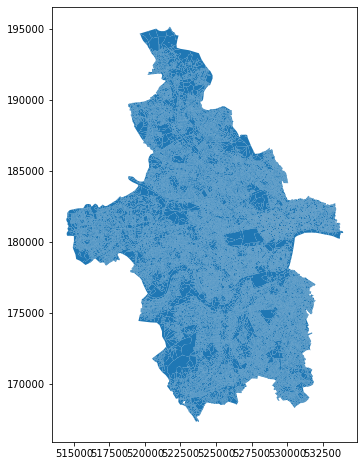

In [55]:
wec = w.append(ec, ignore_index=True)
wecnw = wec.append(nw, ignore_index=True)
wecnwsw = wecnw.append(sw, ignore_index=True)
app = wecnwsw.append(wc, ignore_index=True)

app.plot(figsize=(8, 8))

In [56]:
app.head(3)

,POSTCODE,UPP,PC_AREA,geometry
0,VW00001,00000000000000786671,W,"POLYGON ((523860.000 182560.000, 523860.000 18..."
1,VW00002,00000000000000786672,W,"POLYGON ((524272.669 182990.400, 524267.400 18..."
2,VW00004,00000000000000786674,W,"POLYGON ((524535.000 182634.001, 524535.000 18..."


In [57]:
#Select postcode using a Spatial Join by boundary
postpoly = gpd.sjoin(app, wcb0, op='within')

/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [58]:
postpoly

,POSTCODE,UPP,PC_AREA,geometry,index_right,original,geometry50
0,VW00001,00000000000000786671,W,"POLYGON ((523860.000 182560.000, 523860.000 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
1,VW00002,00000000000000786672,W,"POLYGON ((524272.669 182990.400, 524267.400 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
2,VW00004,00000000000000786674,W,"POLYGON ((524535.000 182634.001, 524535.000 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
3,VW00005,00000000000000786675,W,"POLYGON ((524535.000 182678.000, 524535.000 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
4,VW00006,00000000000000786676,W,"POLYGON ((524563.500 182731.500, 524563.500 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
...,...,...,...,...,...,...,...
53085,WC2R 3JE,00000000000000804829,WC,"POLYGON ((531051.000 180989.002, 531044.280 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
53086,WC2R 3JF,00000000000000804830,WC,"POLYGON ((531027.955 181022.082, 531040.125 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
53088,WC2R 3JJ,00000000000000804831,WC,"POLYGON ((531079.084 181012.399, 531077.353 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."
53089,WC2R 3LD,00000000000000804832,WC,"POLYGON ((531027.955 181022.082, 531043.241 18...",0,"POLYGON ((528549.500 177903.800, 528542.600 17...","POLYGON ((523809.359 182481.546, 523807.932 18..."


In [59]:
postpoly.columns

Index(['POSTCODE', 'UPP', 'PC_AREA', 'geometry', 'index_right', 'original',
       'geometry50'],
      dtype='object')

In [60]:
postpolywestminster = postpoly.filter(['POSTCODE','geometry'], axis=1)
postpolywestminster.shape

(10999, 2)

In [61]:
postpolywestminster

,POSTCODE,geometry
0,VW00001,"POLYGON ((523860.000 182560.000, 523860.000 18..."
1,VW00002,"POLYGON ((524272.669 182990.400, 524267.400 18..."
2,VW00004,"POLYGON ((524535.000 182634.001, 524535.000 18..."
3,VW00005,"POLYGON ((524535.000 182678.000, 524535.000 18..."
4,VW00006,"POLYGON ((524563.500 182731.500, 524563.500 18..."
...,...,...
53085,WC2R 3JE,"POLYGON ((531051.000 180989.002, 531044.280 18..."
53086,WC2R 3JF,"POLYGON ((531027.955 181022.082, 531040.125 18..."
53088,WC2R 3JJ,"POLYGON ((531079.084 181012.399, 531077.353 18..."
53089,WC2R 3LD,"POLYGON ((531027.955 181022.082, 531043.241 18..."


<AxesSubplot:>

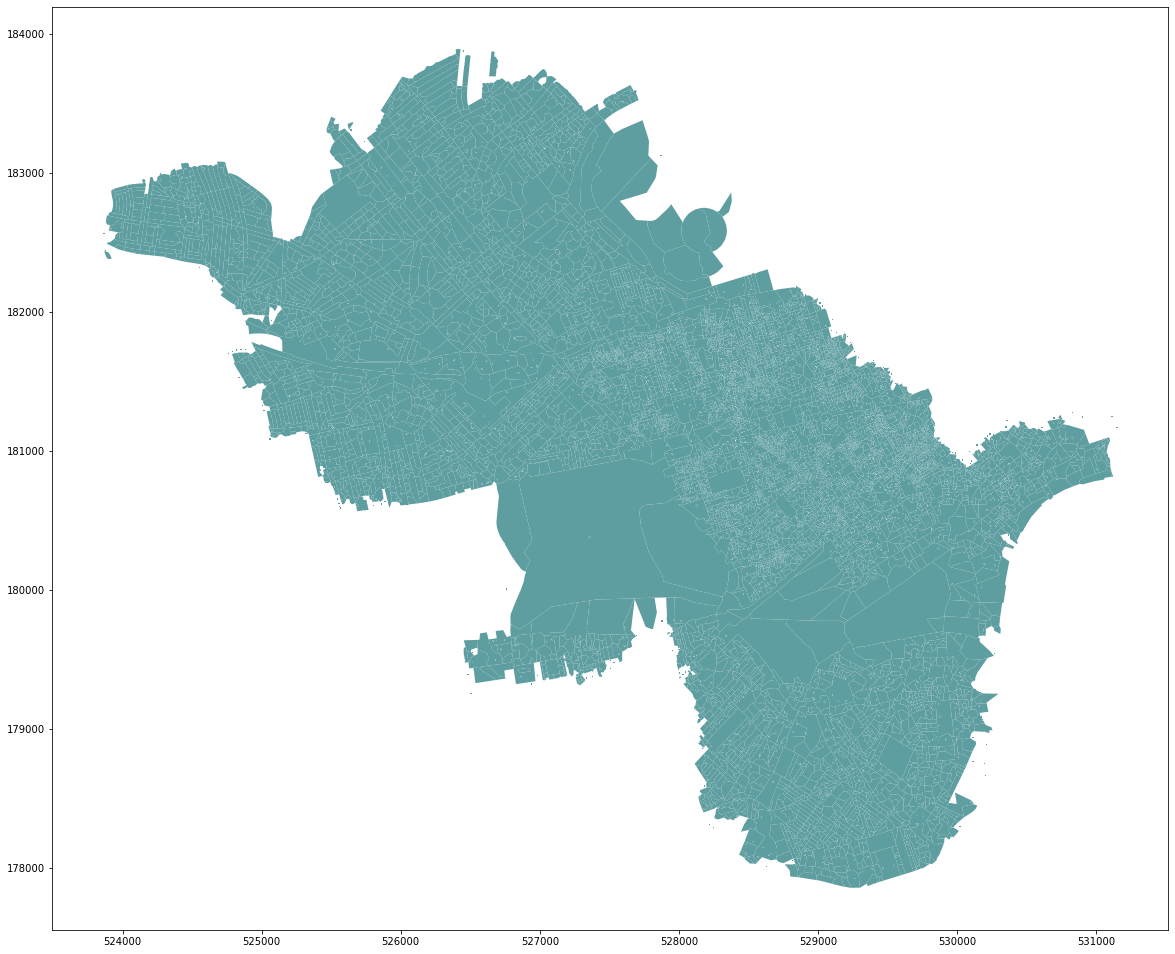

In [62]:
postpolywestminster.plot(figsize=(20, 20), color='cadetblue')

In [63]:
#postpolywestminster.to_file("postpolywestminster.geojson", driver="GeoJSON")

### MERGE

In [64]:
gaspoly = postpolywestminster.merge(newpc, on='POSTCODE', how='left')
gaspoly.shape

(10999, 6)

In [65]:
gaspoly.head(3)

,POSTCODE,geometry,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
0,VW00001,"POLYGON ((523860.000 182560.000, 523860.000 18...",21.0,2.584768e+05,12299.703264,11728.486647
1,VW00002,"POLYGON ((524272.669 182990.400, 524267.400 18...",132.0,1.319845e+06,10057.189284,7953.016815
2,VW00004,"POLYGON ((524535.000 182634.001, 524535.000 18...",7.0,3.975964e+04,5679.949131,5272.997033


In [66]:
gaspoly = gaspoly.fillna(0)

In [67]:
gaspoly.describe()

,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh)
count,10999.000000,1.099900e+04,10999.000000,10999.000000
mean,6.495318,7.462988e+04,3617.565232,3190.257427
std,15.072757,1.738787e+05,7068.447413,6584.436746
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000
75%,6.000000,5.402522e+04,5995.961095,4989.119683
max,228.000000,2.212387e+06,55215.825915,61083.086053


In [78]:
gaspoly000 = gaspoly.loc[gaspoly['Number of meters'] == 0]

<AxesSubplot:>

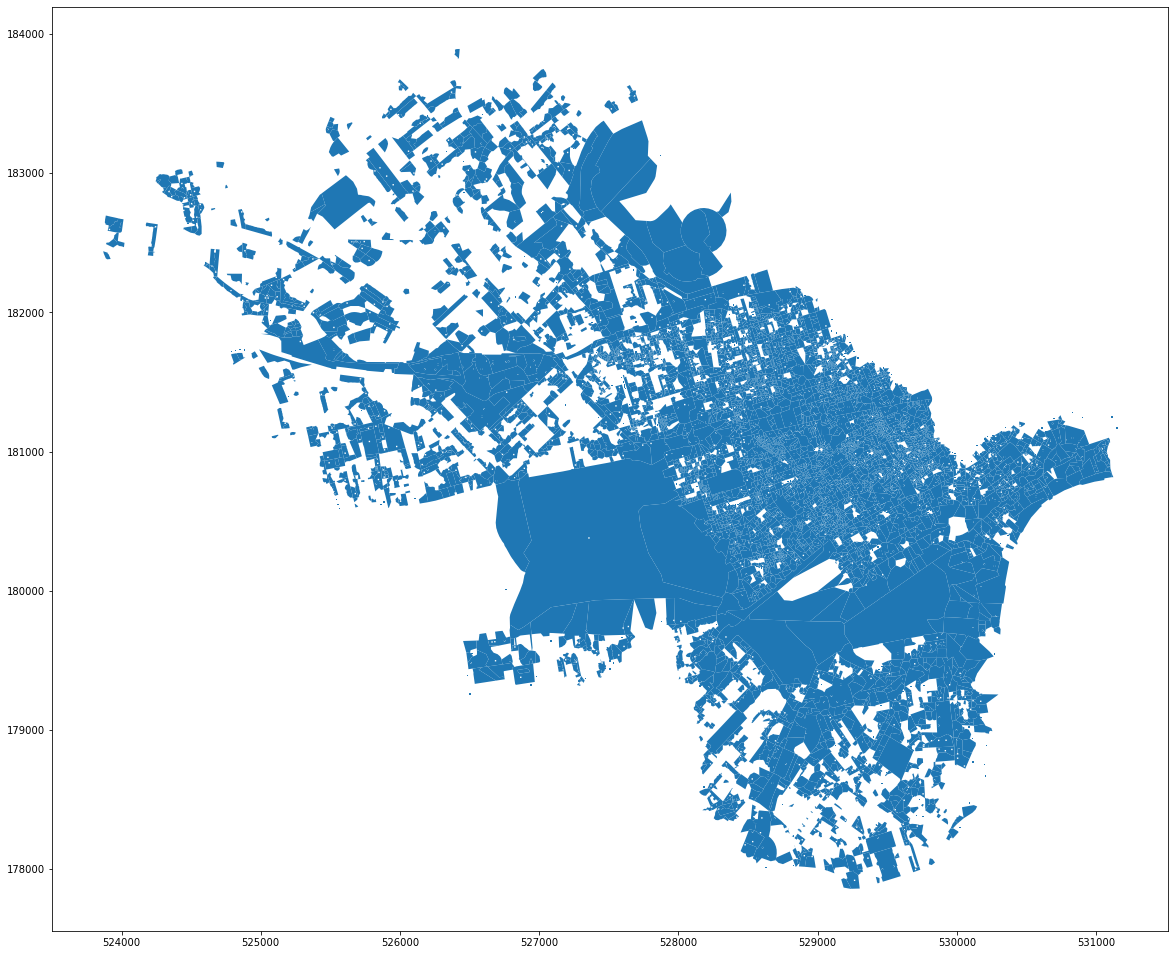

In [80]:
gaspoly000.plot(figsize=(20, 20))

<AxesSubplot:>

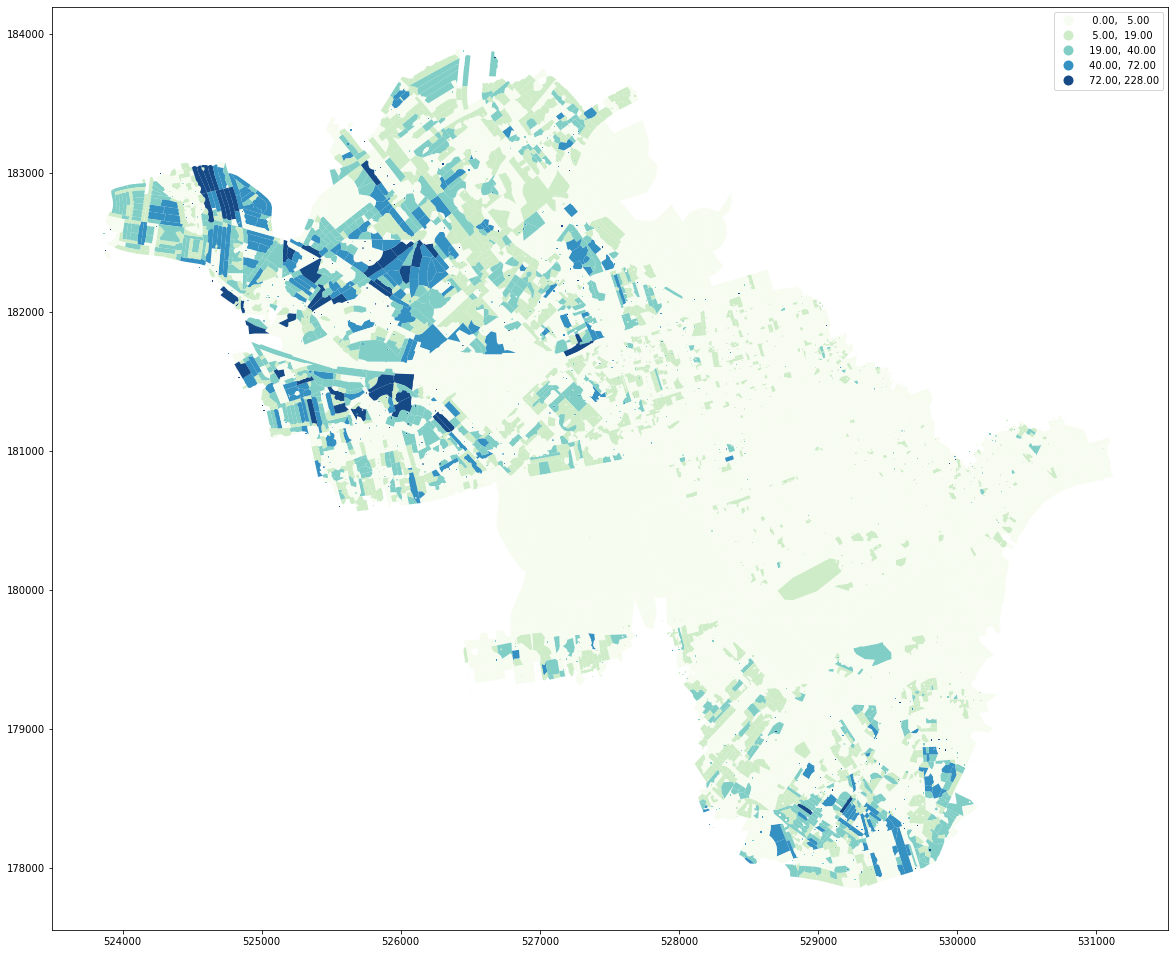

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
#pcpoly.plot(ax=ax, edgecolor='silver', facecolor='None', alpha=0.5); 
#wcb0.plot(ax=ax, color="gainsboro", alpha=0.5)
gaspoly.plot(ax=ax, cmap = 'GnBu', alpha=0.95, column='Number of meters', scheme='fisher_jenks', legend=True)

In [39]:
gaspoly["area"] = gaspoly['geometry'].area
gaspoly['meters_density'] = gaspoly['Number of meters']/gaspoly['area']
gaspoly['con_density'] = gaspoly['Consumption (kWh)']/gaspoly['area']
gaspoly.head(3)

,POSTCODE,geometry,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh),area,meters_density,con_density
0,VW00001,"POLYGON ((523860.000 182560.000, 523860.000 18...",21.0,2.584768e+05,12299.703264,11728.486647,100.00,0.210000,2584.767557
1,VW00002,"POLYGON ((524272.669 182990.400, 524267.400 18...",132.0,1.319845e+06,10057.189284,7953.016815,51.84,2.546296,25459.967365
2,VW00004,"POLYGON ((524535.000 182634.001, 524535.000 18...",7.0,3.975964e+04,5679.949131,5272.997033,100.00,0.070000,397.596439


In [40]:
gaspoly.describe()

,Number of meters,Consumption (kWh),Mean consumption (kWh),Median consumption (kWh),area,meters_density,con_density
count,10999.000000,1.099900e+04,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,6.495318,7.462988e+04,3617.565232,3190.257427,1703.706528,0.032057,344.073675
std,15.072757,1.738787e+05,7068.447413,6584.436746,11145.874590,0.188240,2050.899954
min,0.000000,0.000000e+00,0.000000,0.000000,3.240000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,100.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,412.909635,0.000000,0.000000
75%,6.000000,5.402522e+04,5995.961095,4989.119683,1594.738848,0.004025,49.866765
max,228.000000,2.212387e+06,55215.825915,61083.086053,994567.513798,8.873457,79400.208813


<AxesSubplot:>

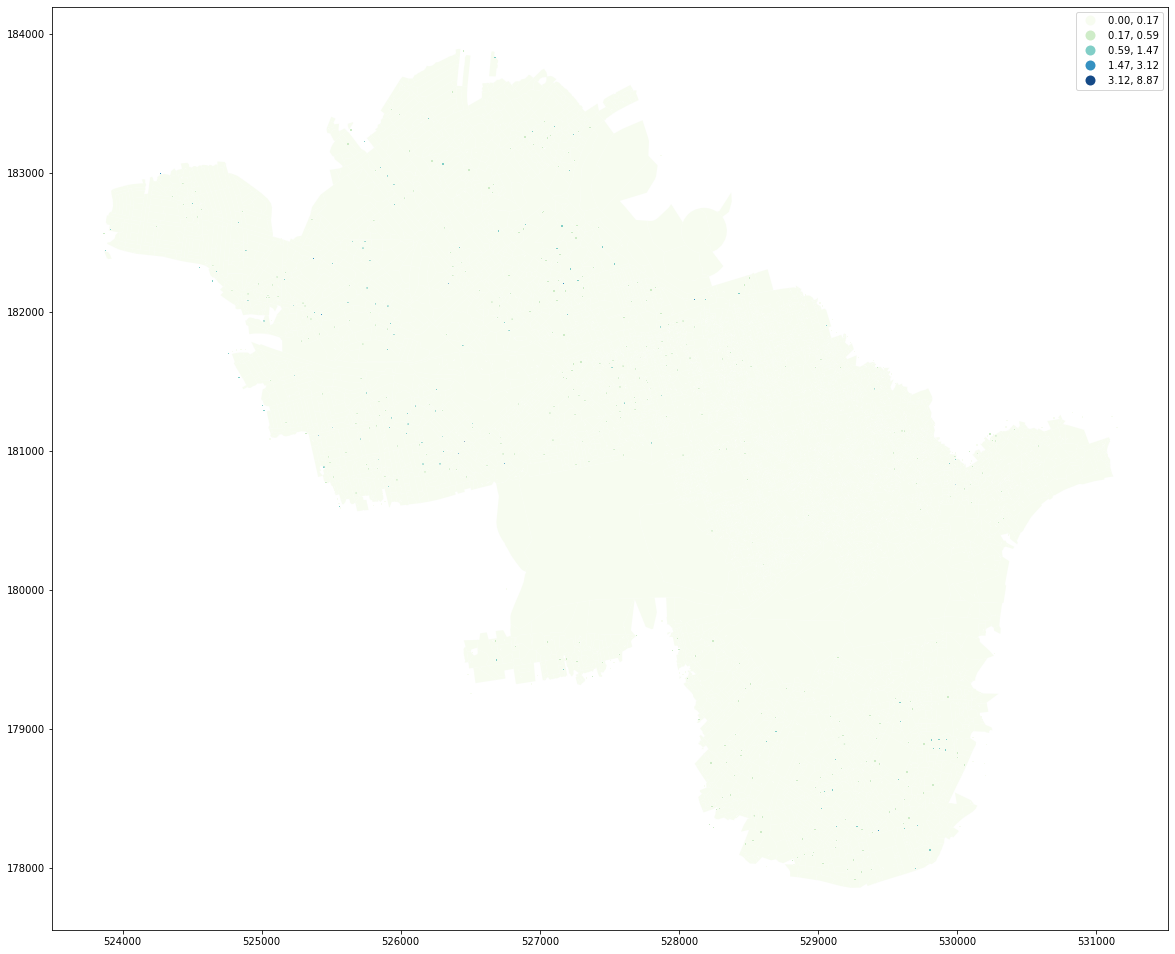

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))
#pcpoly.plot(ax=ax, edgecolor='silver', facecolor='None', alpha=0.5); 
#wcb0.plot(ax=ax, color="gainsboro", alpha=0.5)
gaspoly.plot(ax=ax, cmap = 'GnBu', alpha=0.95, column='meters_density', scheme='fisher_jenks', legend=True)

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
import splot

In [43]:
ay = gaspoly['Number of meters'].values
aw = Queen.from_dataframe(gaspoly)
aw.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 940, ' is an island (no neighbors)')
('WARNING: ', 943, ' is an island (no neighbors)')
('WARNING: ', 970, ' is an island (no neighbors)')
('WARNING: ', 971, ' is an island (no neighbors)')
('WARNING: ', 972, ' is an island (no neighbors)')
('WARNING: ', 1150, ' is an island (no neighbors)')
('WARNING: ', 1170, ' is an island (no neighbors)')
('WARNING: ', 1184, ' is an island (no nei

/Users/xuerongrong/opt/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 90 disconnected components.
 There are 88 islands with ids: 0, 18, 19, 27, 28, 29, 30, 31, 33, 34, 35, 36, 940, 943, 970, 971, 972, 1150, 1170, 1184, 1313, 1368, 1369, 1370, 1382, 1383, 1385, 1469, 1470, 1509, 1528, 1529, 1624, 1626, 1713, 1757, 1889, 7702, 8247, 8310, 9665, 9666, 9878, 9977, 10005, 10026, 10037, 10041, 10122, 10154, 10162, 10203, 10217, 10220, 10223, 10224, 10231, 10293, 10294, 10300, 10301, 10305, 10307, 10308, 10321, 10325, 10352, 10390, 10391, 10412, 10416, 10417, 10421, 10440, 10486, 10489, 10491, 10507, 10549, 10551, 10552, 10553, 10556, 10557, 10592, 10613, 10623, 10636.
  warnings.warn(message)


In [44]:
from esda.moran import Moran
aw = Queen.from_dataframe(gaspoly)
amoran = Moran(ay, aw)
amoran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 940, ' is an island (no neighbors)')
('WARNING: ', 943, ' is an island (no neighbors)')
('WARNING: ', 970, ' is an island (no neighbors)')
('WARNING: ', 971, ' is an island (no neighbors)')
('WARNING: ', 972, ' is an island (no neighbors)')
('WARNING: ', 1150, ' is an island (no neighbors)')
('WARNING: ', 1170, ' is an island (no neighbors)')
('WARNING: ', 1184, ' is an island (no nei

0.25642682705721964